# Smith and Burnt Mill Creeks Salinity Sections
Goal: produce section plots using profiles from across a creek, river, or other section/transect.

In [10]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import cmocean as cm

from scipy.interpolate import griddata

### Find data in correct folder, see test file
Use Smith Creek Transect/CC1320002_20221214_170547.csv for wedge test


In [3]:
# First navigate to data
folderpath = os.path.join('Data', 'Love Grove Bridge CastAway OCN 390')
filepath = os.path.join(folderpath, 'all casts lgb 31.3.25 (upcasts only).csv')
filepath

'Data/Love Grove Bridge CastAway OCN 390/all casts lgb 31.3.25 (upcasts only).csv'

In [5]:
# Read in data and print out first few rows for quick examination
df_full = pd.read_csv(filepath, header = 0)
df_full.head()

,cast #,Depth (m),Salinity (PSU)
0,1,0.578006,1.086670
1,1,0.153280,1.088502
2,2,1.190352,1.058055
3,2,0.766406,1.052438
4,2,0.459848,1.047793


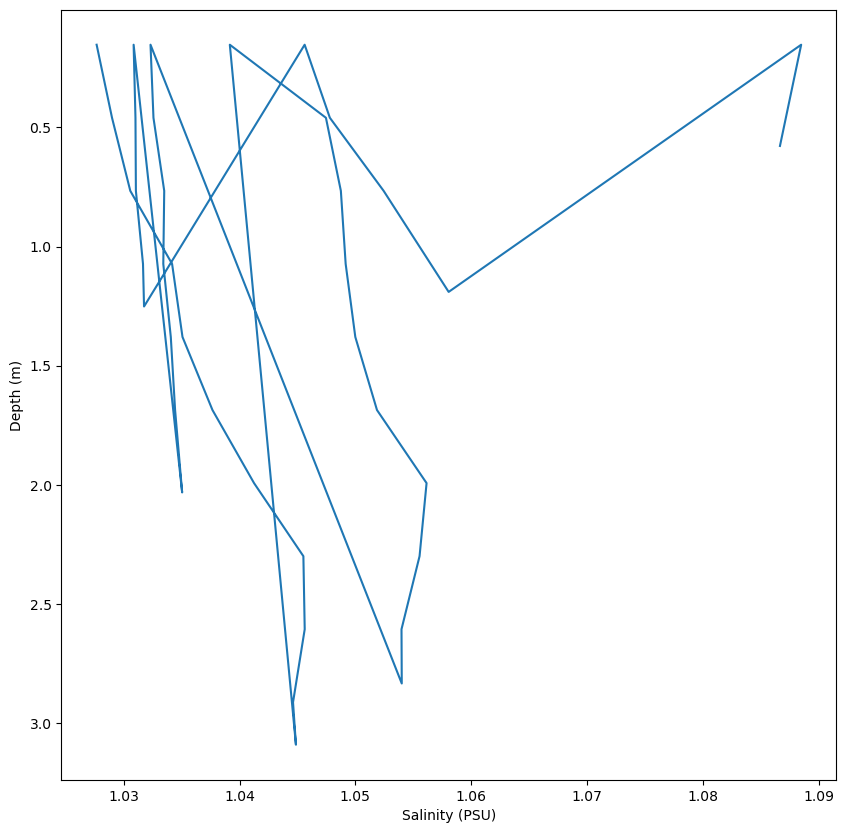

In [6]:
# Plot casts
fig, axs = plt.subplots(figsize = (10, 10))

axs.plot(df_full['Salinity (PSU)'], df_full['Depth (m)'])

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Salinity (PSU)')
plt.gca().invert_yaxis() # Flip the y-axis

figname = os.path.join('Figs-and-Animations', "LGB_Profiles.png")
plt.savefig(figname, dpi = 300, transparent = True)

In [7]:
n_grid = 100

salinity = df_full['Salinity (PSU)']
distance = df_full['cast #']
depth = df_full['Depth (m)']

plotVar = salinity

dist_vec_unique = np.linspace(np.min(distance), np.max(distance), n_grid) # just for gridding
depth_vec_unique = np.linspace(np.min(depth), np.max(depth), n_grid) # just for gridding

dist_grid, depth_grid = np.meshgrid(dist_vec_unique, depth_vec_unique)
plotVar_grid = griddata((distance, depth), plotVar, (dist_grid, depth_grid), method = 'linear')

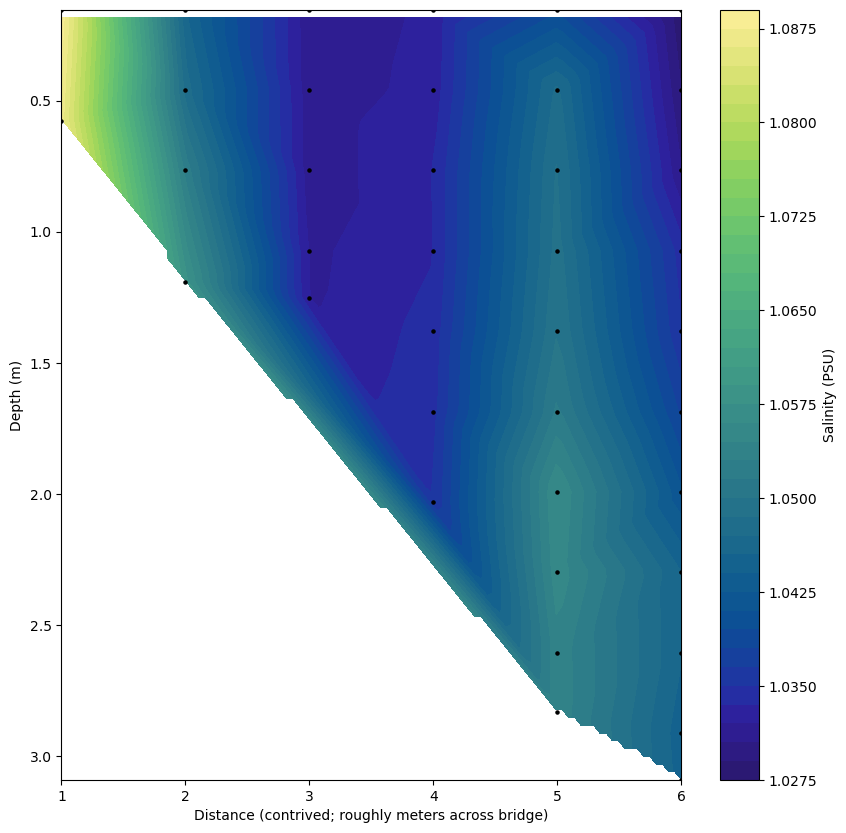

In [14]:
fig, axs = plt.subplots(figsize = (10, 10))
my_cmap = cm.cm.haline # use cmocean colormaps; select for relevant parameter
im = plt.contourf(dist_grid, depth_grid, plotVar_grid, levels = 40, cmap = my_cmap)#, levels = cvec, cmap=myCM, extend="both"))

sc = plt.scatter(distance, depth, c = 'black', s = 5, alpha = 1)
#                cmap=myCM, alpha = 1, vmin=vmn, vmax=vmx)

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Distance (contrived; roughly meters across bridge)')
plt.gca().invert_yaxis() # Flip the y-axis
# plt.gca().invert_xaxis() # Flip the x-axis for now, since Cape Fear River is W edge

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Salinity (PSU)')

figname = os.path.join('Figs-and-Animations', "LGB_transect.png")
plt.savefig(figname, dpi = 300, transparent = True)